In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, ComplementNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn import metrics
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from scipy.stats import chi2_contingency
import scipy.stats as stats
from math import floor
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import RandomizedSearchCV
from tabulate import tabulate

In [25]:
df =pd.read_excel('/content/drive/MyDrive/df_definitivo.xlsx', index_col=0)
df.head()

,IN_DEFAULT_FLG,DATE,ind_disp,ind_rot_mag,ind_sost_on_fin,ind_deb_su_fat,ind_ela_att,ind_liq_fat,ind_acid,ind_cop_on_fin,...,ind_var_grs_prf,ind_in_out_ratio,ind_med_out,ind_max_in_out_ratio,BAG_NGRANT_UOVD_CNT,BAG_DBAL_SUM,Dpd3_D,BAG_POVD500_DPD_DMAX,SECTOR_CD,Sector_CL
CUSTOMER_RK,,,,,,,,,,,,,,,,,,,,,
14304338,N,2013-12-31,1.05,25.88,0.00,0.11,0.35,0.03,0.69,959.30,...,-2303.61,1.00,1.00,1.00,2.0,9059.39,"[0,1)",2,05S,4
14304724,N,2013-12-31,0.13,79.20,0.01,0.21,0.05,0.00,0.07,93.49,...,1299.27,0.85,13714.43,1.00,2.0,30002.00,"[0,1)",2,35S,4
14304725,N,2013-12-31,0.05,137.23,0.02,0.20,0.01,0.00,0.02,52.12,...,431.98,0.45,9897.02,0.75,2.0,46914.19,"[0,1)",2,34S,4
14304732,N,2013-12-31,0.35,10.96,0.01,0.27,0.17,0.00,0.01,165.58,...,835.27,0.80,7266.80,0.88,2.0,140874.01,"[0,1)",2,05S,4
14304884,N,2013-12-31,6.39,1.18,0.01,0.15,0.38,0.06,0.85,173.60,...,710.18,1.13,7614.91,1.66,2.0,268.87,"[0,1)",2,01S,2


In [26]:
print(df['IN_DEFAULT_FLG'].value_counts())
map_gen = {'Y':1, 'N':0}
df['IN_DEFAULT_FLG'] = df['IN_DEFAULT_FLG'].map(map_gen)

N    33864
Y      550
Name: IN_DEFAULT_FLG, dtype: int64


In [27]:
print(df['Dpd3_D'].value_counts())
map_gen = {'[0,1)':1, '[1,293]':0}
df['Dpd3_D'] = df['Dpd3_D'].map(map_gen)

[0,1)      34272
[1,293]      142
Name: Dpd3_D, dtype: int64


In [28]:
X = df.drop(['IN_DEFAULT_FLG', 'DATE', 'SECTOR_CD', 'Sector_CL'], axis = 1)
y = df['IN_DEFAULT_FLG']
X_tr, X_test, y_tr, y_test = train_test_split(X,y, test_size= 0.3, random_state=42)
X_train = X_tr.values
y_train = y_tr.values
X_test = X_test.values
y_test = y_test.values

In [29]:
#REGRESSIONE LOGISTICA
lr = LogisticRegression(random_state=42, max_iter=10000)
lr.fit(X_train, y_train)
y_train_pred_lr = lr.predict(X_train)
print('Report train')
print(classification_report(y_train, y_train_pred_lr))
print('------------')
print('------------')
y_test_pred_lr = lr.predict(X_test)
print('Report test')
print(classification_report(y_test, y_test_pred_lr))

recall_lr = round(recall_score(y_test, y_test_pred_lr, pos_label=1), 2)
precision_lr = round(precision_score(y_test, y_test_pred_lr, pos_label=1), 2)
accuracy_lr = round(accuracy_score(y_test, y_test_pred_lr), 2)

for nome_predittore, coefficiente in zip(X.columns, lr.coef_[0]):
    print(f'Predittore: {nome_predittore}, Coefficiente: {coefficiente}')

Report train
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     23683
           1       0.10      0.00      0.01       406

    accuracy                           0.98     24089
   macro avg       0.54      0.50      0.50     24089
weighted avg       0.97      0.98      0.97     24089

------------
------------
Report test
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     10181
           1       0.12      0.01      0.01       144

    accuracy                           0.99     10325
   macro avg       0.56      0.50      0.50     10325
weighted avg       0.97      0.99      0.98     10325

Predittore: ind_disp, Coefficiente: -1.5805295338206018e-05
Predittore: ind_rot_mag, Coefficiente: -1.872524677127774e-05
Predittore: ind_sost_on_fin, Coefficiente: -7.345192477425178e-08
Predittore: ind_deb_su_fat, Coefficiente: -1.1847980591542954e-06
Predittore: ind_ela_att, Coefficiente: -2

In [30]:
#ALBERO DI CLASSIFICAZIONE
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)
print('Report train')
print(classification_report(y_train, y_train_pred))
print('------------')
print('------------')
y_test_pred_tree = tree.predict(X_test)
print('Report test')
print(classification_report(y_test, y_test_pred_tree))

recall_tree = round(recall_score(y_test, y_test_pred_tree, pos_label=1), 2)
precision_tree = round(precision_score(y_test, y_test_pred_tree, pos_label=1), 2)
accuracy_tree = round(accuracy_score(y_test, y_test_pred_tree), 2)

Report train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23683
           1       1.00      1.00      1.00       406

    accuracy                           1.00     24089
   macro avg       1.00      1.00      1.00     24089
weighted avg       1.00      1.00      1.00     24089

------------
------------
Report test
              precision    recall  f1-score   support

           0       0.99      0.98      0.98     10181
           1       0.07      0.10      0.09       144

    accuracy                           0.97     10325
   macro avg       0.53      0.54      0.53     10325
weighted avg       0.97      0.97      0.97     10325



In [31]:

# TABELLA CON LE METRICHE
nomi_modelli1 = ['Logistic Regression', 'Tree']
recall1 = [recall_lr, recall_tree]
precision1 = [precision_lr, precision_tree]
accuracy1 = [accuracy_lr, accuracy_tree]


data1 = {
    'Model': nomi_modelli1,
    'Recall': recall1,
    'Precision': precision1,
    'Accuracy': accuracy1
}


tab1 = pd.DataFrame(data1)


tab1.set_index('Model', inplace=True)


table_title1 = "Table of Model Metrics on the Y class (test set)"


tabulated_tab1 = tabulate(tab1, headers='keys', tablefmt='fancy_grid', showindex=True)


print(table_title1)
print(tabulated_tab1)


Table of Model Metrics on the Y class (test set)
╒═════════════════════╤══════════╤═════════════╤════════════╕
│ Model               │   Recall │   Precision │   Accuracy │
╞═════════════════════╪══════════╪═════════════╪════════════╡
│ Logistic Regression │     0.01 │        0.12 │       0.99 │
├─────────────────────┼──────────┼─────────────┼────────────┤
│ Tree                │     0.1  │        0.07 │       0.97 │
╘═════════════════════╧══════════╧═════════════╧════════════╛


In [32]:
#SMOTE AND CLASS_WEIGHTS BALANCED
smote = SMOTE(random_state=42)
X_train_ov, y_train_ov = smote.fit_resample(X_tr, y_tr)
X_train_ov = X_train_ov.values
y_train_ov = y_train_ov.values

In [33]:
#REGRESSIONE LOGISTICA BALANCED
lr_b = LogisticRegression(class_weight='balanced', random_state=42, max_iter=10000)
lr_b.fit(X_train, y_train)
y_train_pred_lr_b = lr_b.predict(X_train)
print('Report train')
print(classification_report(y_train, y_train_pred_lr_b))
print('------------')
print('------------')
y_test_pred_lr_b = lr_b.predict(X_test)
print('Report test')
print(classification_report(y_test, y_test_pred_lr_b))

recall_lr_b = round(recall_score(y_test, y_test_pred_lr_b, pos_label=1), 2)
precision_lr_b = round(precision_score(y_test, y_test_pred_lr_b, pos_label=1), 2)
accuracy_lr_b = round(accuracy_score(y_test, y_test_pred_lr_b), 2)

for nome_predittore, coefficiente in zip(X.columns, lr_b.coef_[0]):
    print(f'Predittore: {nome_predittore}, Coefficiente: {coefficiente}')

Report train
              precision    recall  f1-score   support

           0       0.99      0.67      0.80     23683
           1       0.03      0.67      0.06       406

    accuracy                           0.67     24089
   macro avg       0.51      0.67      0.43     24089
weighted avg       0.98      0.67      0.79     24089

------------
------------
Report test
              precision    recall  f1-score   support

           0       0.99      0.68      0.81     10181
           1       0.03      0.69      0.06       144

    accuracy                           0.68     10325
   macro avg       0.51      0.68      0.43     10325
weighted avg       0.98      0.68      0.80     10325

Predittore: ind_disp, Coefficiente: -8.220798012922963e-08
Predittore: ind_rot_mag, Coefficiente: 2.9751624578885434e-05
Predittore: ind_sost_on_fin, Coefficiente: -1.7191078922318376e-10
Predittore: ind_deb_su_fat, Coefficiente: 3.44171928292667e-10
Predittore: ind_ela_att, Coefficiente: 1.070

In [34]:
#REGRESSIONE LOGISTICA SMOTE
lr_s = LogisticRegression(random_state=42, max_iter=10000)
lr_s.fit(X_train_ov, y_train_ov)
y_train_pred_lr_s = lr_s.predict(X_train_ov)
print('Report train')
print(classification_report(y_train_ov, y_train_pred_lr_s))
print('------------')
print('------------')
y_test_pred_lr_s = lr_s.predict(X_test)
print('Report test')
print(classification_report(y_test, y_test_pred_lr_s))

recall_lr_s = round(recall_score(y_test, y_test_pred_lr_s, pos_label=1), 2)
precision_lr_s = round(precision_score(y_test, y_test_pred_lr_s, pos_label=1), 2)
accuracy_lr_s = round(accuracy_score(y_test, y_test_pred_lr_s), 2)

for nome_predittore, coefficiente in zip(X.columns, lr_s.coef_[0]):
    print(f'Predittore: {nome_predittore}, Coefficiente: {coefficiente}')

Report train
              precision    recall  f1-score   support

           0       0.68      0.70      0.69     23683
           1       0.69      0.67      0.68     23683

    accuracy                           0.69     47366
   macro avg       0.69      0.69      0.69     47366
weighted avg       0.69      0.69      0.69     47366

------------
------------
Report test
              precision    recall  f1-score   support

           0       0.99      0.70      0.82     10181
           1       0.03      0.63      0.06       144

    accuracy                           0.70     10325
   macro avg       0.51      0.67      0.44     10325
weighted avg       0.98      0.70      0.81     10325

Predittore: ind_disp, Coefficiente: -9.446643092408027e-08
Predittore: ind_rot_mag, Coefficiente: 3.5302571742153006e-05
Predittore: ind_sost_on_fin, Coefficiente: -2.2613514542111275e-10
Predittore: ind_deb_su_fat, Coefficiente: -7.945165042208833e-10
Predittore: ind_ela_att, Coefficiente: 2.9

In [35]:
#ALBERO DI CLASSIFICAZIONE BALANCED
tree_b = DecisionTreeClassifier(class_weight='balanced', random_state=42)
#Ottimizzazione iperparametri
param_dist = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 5, 7],
    'max_leaf_nodes': [None, 5, 10, 20]
}


random_search = RandomizedSearchCV(tree_b, param_distributions=param_dist, n_iter=20, scoring=['accuracy', 'recall'], cv=5, refit='recall', random_state=42)
random_search.fit(X_train, y_train)


best_tree_b = random_search.best_estimator_
y_train_pred_tree_b = best_tree_b.predict(X_train)
print('Report train')
print(classification_report(y_train, y_train_pred_tree_b))
print('------------')
print('------------')
y_test_pred_tree_b = best_tree_b.predict(X_test)
print('Report test')
print(classification_report(y_test, y_test_pred_tree_b))

recall_tree_b = round(recall_score(y_test, y_test_pred_tree_b, pos_label=1), 2)
precision_tree_b = round(precision_score(y_test, y_test_pred_tree_b, pos_label=1), 2)
accuracy_tree_b = round(accuracy_score(y_test, y_test_pred_tree_b), 2)

Report train
              precision    recall  f1-score   support

           0       1.00      0.57      0.73     23683
           1       0.03      0.84      0.06       406

    accuracy                           0.58     24089
   macro avg       0.51      0.71      0.40     24089
weighted avg       0.98      0.58      0.72     24089

------------
------------
Report test
              precision    recall  f1-score   support

           0       1.00      0.58      0.73     10181
           1       0.03      0.87      0.06       144

    accuracy                           0.59     10325
   macro avg       0.51      0.72      0.39     10325
weighted avg       0.98      0.59      0.73     10325



In [36]:
#ALBERO DI CLASSIFICAZIONE SMOTE
tree_s = DecisionTreeClassifier(random_state=42)
#Ottimizzazione iperparametri
param_dist = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 5, 7],
    'max_leaf_nodes': [None, 5, 10, 20]
}


random_search = RandomizedSearchCV(tree_s, param_distributions=param_dist, n_iter=20, scoring=['accuracy', 'recall'], cv=5, refit='recall', random_state=42)
random_search.fit(X_train_ov, y_train_ov)


best_tree_s = random_search.best_estimator_
y_train_pred_tree_s = best_tree_s.predict(X_train_ov)
print('Report train')
print(classification_report(y_train_ov, y_train_pred_tree_s))
print('------------')
print('------------')
y_test_pred_tree_s = best_tree_s.predict(X_test)
print('Report test')
print(classification_report(y_test, y_test_pred_tree_s))

recall_tree_s = round(recall_score(y_test, y_test_pred_tree_s, pos_label=1), 2)
precision_tree_s = round(precision_score(y_test, y_test_pred_tree_s, pos_label=1), 2)
accuracy_tree_s = round(accuracy_score(y_test, y_test_pred_tree_s), 2)

Report train
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     23683
           1       0.99      0.99      0.99     23683

    accuracy                           0.99     47366
   macro avg       0.99      0.99      0.99     47366
weighted avg       0.99      0.99      0.99     47366

------------
------------
Report test
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     10181
           1       0.09      0.22      0.13       144

    accuracy                           0.96     10325
   macro avg       0.54      0.59      0.55     10325
weighted avg       0.98      0.96      0.97     10325



In [37]:
#RANDOM FOREST BALANCED
rf_b = RandomForestClassifier(class_weight='balanced', random_state=42)

#Ottimizzazione iperparametri
param_dist = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 5, 7],
    'max_leaf_nodes': [None, 5, 10, 20]
}


random_search = RandomizedSearchCV(rf_b, param_distributions=param_dist, n_iter=20, scoring=['accuracy', 'recall'], cv=5, refit='recall', random_state=42)
random_search.fit(X_train, y_train)


best_rf_b = random_search.best_estimator_
y_train_pred_rf_b = best_rf_b.predict(X_train)
print('Report train')
print(classification_report(y_train, y_train_pred_rf_b))
print('------------')
print('------------')
y_test_pred_rf_b = best_rf_b.predict(X_test)
print('Report test')
print(classification_report(y_test, y_test_pred_rf_b))

recall_rf_b = round(recall_score(y_test, y_test_pred_rf_b, pos_label=1), 2)
precision_rf_b = round(precision_score(y_test, y_test_pred_rf_b, pos_label=1), 2)
accuracy_rf_b = round(accuracy_score(y_test, y_test_pred_rf_b), 2)

Report train
              precision    recall  f1-score   support

           0       0.99      0.76      0.86     23683
           1       0.05      0.76      0.10       406

    accuracy                           0.76     24089
   macro avg       0.52      0.76      0.48     24089
weighted avg       0.98      0.76      0.85     24089

------------
------------
Report test
              precision    recall  f1-score   support

           0       1.00      0.77      0.87     10181
           1       0.05      0.78      0.09       144

    accuracy                           0.77     10325
   macro avg       0.52      0.77      0.48     10325
weighted avg       0.98      0.77      0.86     10325



In [38]:
#RANDOM FOREST SMOTE
rf_s = RandomForestClassifier(random_state=42)

#Ottimizzazione iperparametri
param_dist = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 5 ,7],
    'max_leaf_nodes': [None, 5, 10, 20]
}


random_search = RandomizedSearchCV(rf_s, param_distributions=param_dist, n_iter=20, scoring=['accuracy', 'recall'], cv=5, refit='recall', random_state=42)
random_search.fit(X_train_ov, y_train_ov)


best_rf_s = random_search.best_estimator_
y_train_pred_rf_s = best_rf_s.predict(X_train_ov)
print('Report train')
print(classification_report(y_train_ov, y_train_pred_rf_s))
print('------------')
print('------------')
y_test_pred_rf_s = best_rf_s.predict(X_test)
print('Report test')
print(classification_report(y_test, y_test_pred_rf_s))

recall_rf_s = round(recall_score(y_test, y_test_pred_rf_s, pos_label=1), 2)
precision_rf_s = round(precision_score(y_test, y_test_pred_rf_s, pos_label=1), 2)
accuracy_rf_s = round(accuracy_score(y_test, y_test_pred_rf_s), 2)

Report train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23683
           1       1.00      1.00      1.00     23683

    accuracy                           1.00     47366
   macro avg       1.00      1.00      1.00     47366
weighted avg       1.00      1.00      1.00     47366

------------
------------
Report test
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     10181
           1       0.27      0.23      0.25       144

    accuracy                           0.98     10325
   macro avg       0.63      0.61      0.62     10325
weighted avg       0.98      0.98      0.98     10325



In [39]:
#EXTRA TREES BALANCED
et_b = ExtraTreesClassifier(class_weight='balanced', random_state=42)

#Ottimizzazione iperparametri
param_dist = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 5, 7],
    'max_leaf_nodes': [None, 5, 10, 20]
}


random_search = RandomizedSearchCV(et_b, param_distributions=param_dist, n_iter=20, scoring=['accuracy', 'recall'], cv=5, refit='recall', random_state=42)
random_search.fit(X_train, y_train)


best_et_b = random_search.best_estimator_
y_train_pred_et_b = best_et_b.predict(X_train)
print('Report train')
print(classification_report(y_train, y_train_pred_et_b))
print('------------')
print('------------')
y_test_pred_et_b = best_et_b.predict(X_test)
print('Report test')
print(classification_report(y_test, y_test_pred_et_b))

recall_et_b = round(recall_score(y_test, y_test_pred_et_b, pos_label=1), 2)
precision_et_b = round(precision_score(y_test, y_test_pred_et_b, pos_label=1), 2)
accuracy_et_b = round(accuracy_score(y_test, y_test_pred_et_b), 2)

Report train
              precision    recall  f1-score   support

           0       0.99      0.92      0.95     23683
           1       0.10      0.51      0.16       406

    accuracy                           0.91     24089
   macro avg       0.54      0.71      0.56     24089
weighted avg       0.98      0.91      0.94     24089

------------
------------
Report test
              precision    recall  f1-score   support

           0       0.99      0.92      0.95     10181
           1       0.07      0.47      0.13       144

    accuracy                           0.91     10325
   macro avg       0.53      0.69      0.54     10325
weighted avg       0.98      0.91      0.94     10325



In [40]:
#EXTRA TREES SMOTE
et_s = ExtraTreesClassifier(random_state=42)

#Ottimizzazione iperparametri
param_dist = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 5, 7],
    'max_leaf_nodes': [None, 5, 10, 20]
}


random_search = RandomizedSearchCV(et_s, param_distributions=param_dist, n_iter=20, scoring=['accuracy', 'recall'], cv=5, refit='recall', random_state=42)
random_search.fit(X_train_ov, y_train_ov)


best_et_s = random_search.best_estimator_
y_train_pred_et_s = best_et_s.predict(X_train_ov)
print('Report train')
print(classification_report(y_train_ov, y_train_pred_et_s))
print('------------')
print('------------')
y_test_pred_et_s = best_et_s.predict(X_test)
print('Report test')
print(classification_report(y_test, y_test_pred_et_s))

recall_et_s = round(recall_score(y_test, y_test_pred_et_s, pos_label=1), 2)
precision_et_s = round(precision_score(y_test, y_test_pred_et_s, pos_label=1), 2)
accuracy_et_s = round(accuracy_score(y_test, y_test_pred_et_s), 2)

Report train
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     23683
           1       0.99      0.93      0.95     23683

    accuracy                           0.96     47366
   macro avg       0.96      0.96      0.96     47366
weighted avg       0.96      0.96      0.96     47366

------------
------------
Report test
              precision    recall  f1-score   support

           0       0.99      0.98      0.98     10181
           1       0.17      0.35      0.23       144

    accuracy                           0.97     10325
   macro avg       0.58      0.66      0.60     10325
weighted avg       0.98      0.97      0.97     10325



In [41]:
# TABELLA PER LE METRICHE SUL TEST SET
nomi_modelli2 = ['Logistic Regression Balanced', 'Logistic Regression with Smote', 'Tree Balanced', 'Tree with Smote', 'Random Forest Balanced', 'Random Forest with Smote',
                'Extra Tree Balanced', 'Extra Tree with Smote']
recall2 = [recall_lr_b, recall_lr_s, recall_tree_b, recall_tree_s, recall_rf_b, recall_rf_s, recall_et_b, recall_et_s]
precision2 = [precision_lr_b, precision_lr_s, precision_tree_b, precision_tree_s, precision_rf_b, precision_rf_s, precision_et_b, precision_et_s]
accuracy2 = [accuracy_lr_b, accuracy_lr_s, accuracy_tree_b, accuracy_tree_s, accuracy_rf_b, accuracy_rf_s, accuracy_et_b, accuracy_et_s]


data2 = {
    'Model': nomi_modelli2,
    'Recall': recall2,
    'Precision': precision2,
    'Accuracy': accuracy2
}


tab2 = pd.DataFrame(data2)


tab2.set_index('Model', inplace=True)


table_title2 = "Table of Model Metrics on the Y class (test set)"


tabulated_tab2 = tabulate(tab2, headers='keys', tablefmt='fancy_grid', showindex=True)


print(table_title2)
print(tabulated_tab2)

Table of Model Metrics on the Y class (test set)
╒════════════════════════════════╤══════════╤═════════════╤════════════╕
│ Model                          │   Recall │   Precision │   Accuracy │
╞════════════════════════════════╪══════════╪═════════════╪════════════╡
│ Logistic Regression Balanced   │     0.69 │        0.03 │       0.68 │
├────────────────────────────────┼──────────┼─────────────┼────────────┤
│ Logistic Regression with Smote │     0.63 │        0.03 │       0.7  │
├────────────────────────────────┼──────────┼─────────────┼────────────┤
│ Tree Balanced                  │     0.87 │        0.03 │       0.59 │
├────────────────────────────────┼──────────┼─────────────┼────────────┤
│ Tree with Smote                │     0.22 │        0.09 │       0.96 │
├────────────────────────────────┼──────────┼─────────────┼────────────┤
│ Random Forest Balanced         │     0.78 │        0.05 │       0.77 │
├────────────────────────────────┼──────────┼─────────────┼────────────┤
│ 

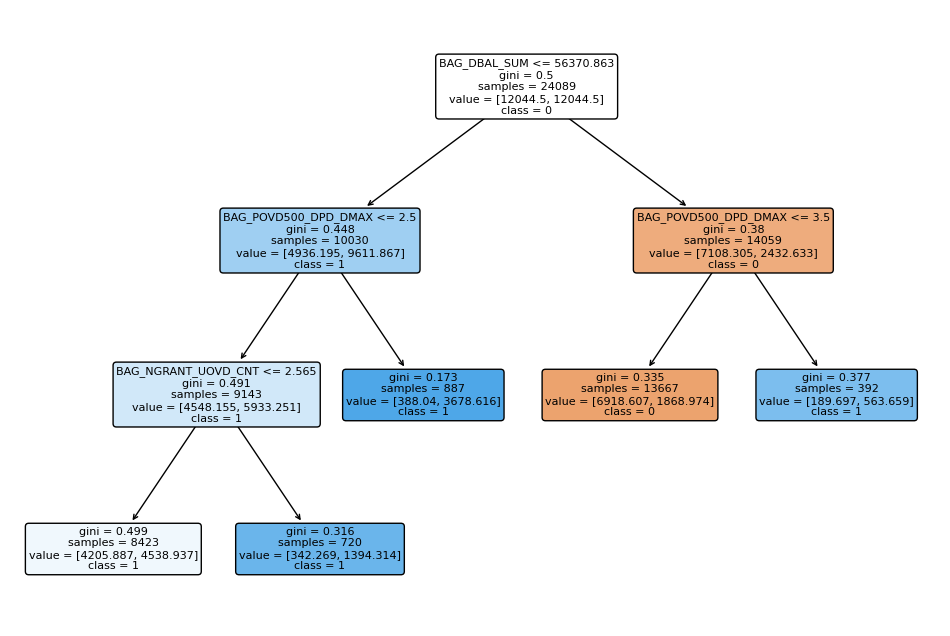

In [42]:
#PLOT TREE BALANCED
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 8))
plot_tree(best_tree_b, filled=True, rounded=True,feature_names=X.columns, class_names=[str(x) for x in y.unique()])
plt.show()